In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df=pd.read_csv('Cleaned_data.csv')

In [154]:
df.drop(columns=["Unnamed: 0",'Yield_log','Yield','Production'],axis=0,inplace=True)


In [155]:
df.isnull().sum()

,0
State,0
District,0
Crop,0
Crop_Year,0
Season,0
Area,0
Production_Tonnes,0
Yield_Tonnes_Per_Hectare,0


In [156]:
df.describe()

,Crop_Year,Area,Production_Tonnes,Yield_Tonnes_Per_Hectare
count,297040.000000,2.970400e+05,2.970400e+05,297040.000000
mean,2008.768984,1.356787e+04,8.323182e+03,0.751184
std,6.563858,4.916633e+04,4.944478e+04,1.644490
min,1997.000000,2.012000e+01,0.000000e+00,0.000000
25%,2003.000000,1.780000e+02,1.921750e+00,0.001448
50%,2009.000000,9.170000e+02,1.040000e+02,0.251853
75%,2015.000000,5.895000e+03,1.754000e+03,0.810028
max,2020.000000,8.580100e+06,2.069354e+06,50.049153


In [157]:
df.columns

Index(['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area',
       'Production_Tonnes', 'Yield_Tonnes_Per_Hectare'],
      dtype='object')

In [158]:
df.duplicated().sum()

np.int64(0)

In [159]:
np.average(df['Yield_Tonnes_Per_Hectare'])

np.float64(0.7511844060772939)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297040 entries, 0 to 297039
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   State                     297040 non-null  object 
 1   District                  297040 non-null  object 
 2   Crop                      297040 non-null  object 
 3   Crop_Year                 297040 non-null  int64  
 4   Season                    297040 non-null  object 
 5   Area                      297040 non-null  float64
 6   Production_Tonnes         297040 non-null  float64
 7   Yield_Tonnes_Per_Hectare  297040 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.1+ MB


In [161]:
for i in df.columns:
    print(f"{i} : {df[i].nunique()}")

State : 36
District : 706
Crop : 55
Crop_Year : 24
Season : 6
Area : 47409
Production_Tonnes : 79139
Yield_Tonnes_Per_Hectare : 205927


<Axes: title={'center': 'Frequency of Crops'}, xlabel='Crop'>

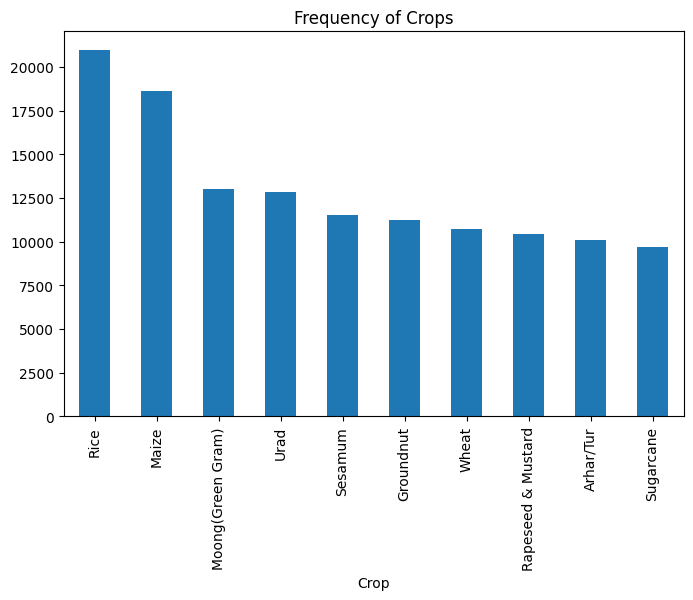

In [162]:
df['Crop'].value_counts().head(10).plot(kind='bar', figsize=(8,5), title='Frequency of Crops')


<Axes: title={'center': 'Frequency of States'}, xlabel='State'>

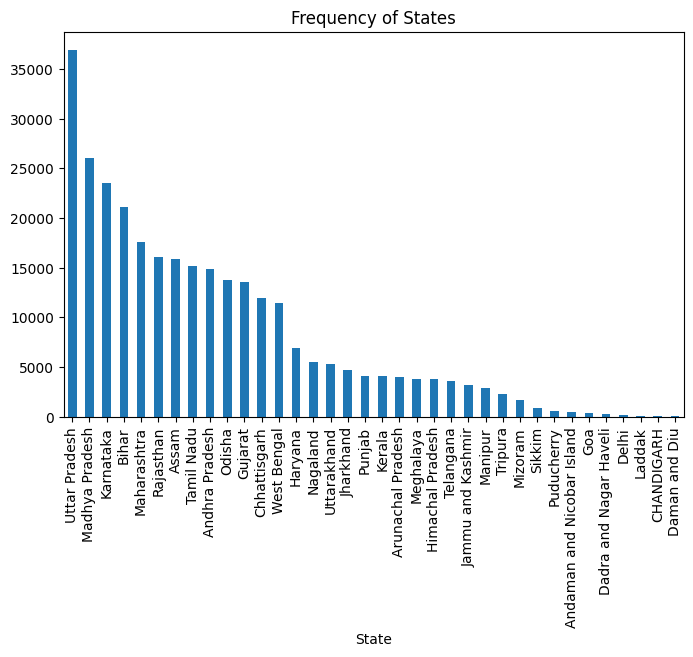

In [163]:
df['State'].value_counts().plot(kind='bar', figsize=(8,5), title='Frequency of States')


<Axes: title={'center': 'Frequency of District_Name'}, xlabel='District'>

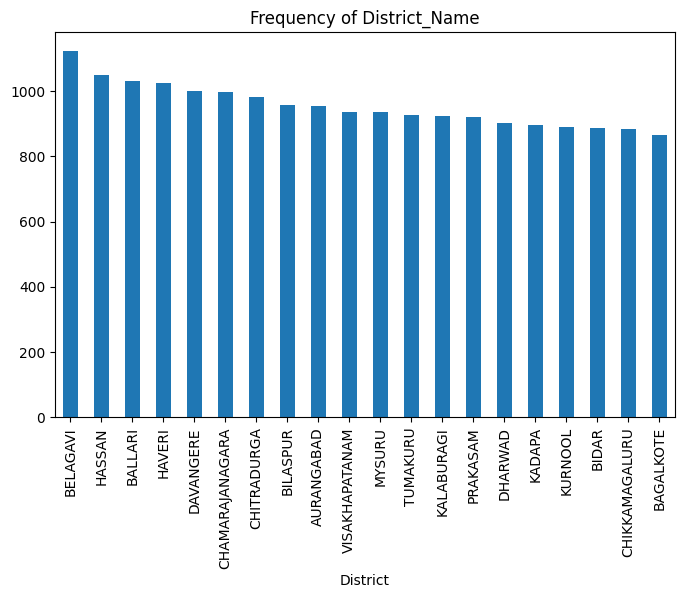

In [164]:
df['District'].value_counts().head(20).plot(kind='bar', figsize=(8,5), title='Frequency of District_Name')


<Axes: title={'center': 'Frequency of Season'}, xlabel='Season'>

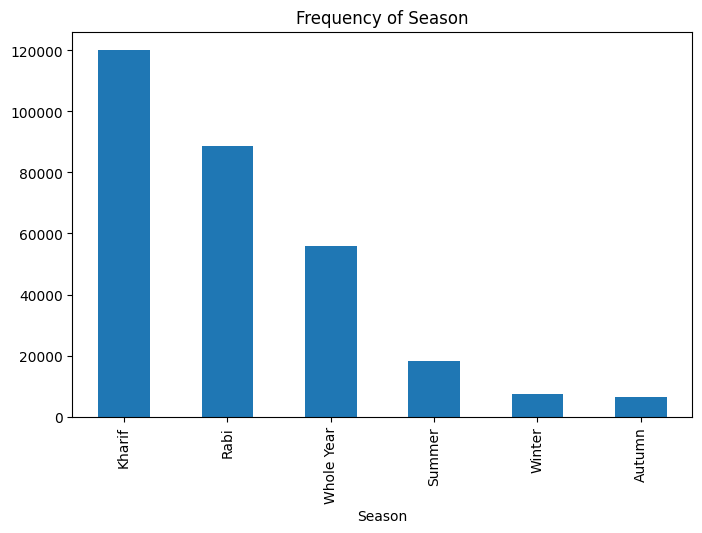

In [165]:
df['Season'].value_counts().plot(kind='bar', figsize=(8,5), title='Frequency of Season')


{'whiskers': [<matplotlib.lines.Line2D at 0x7967da91e630>,
 'caps': [<matplotlib.lines.Line2D at 0x7967da46d310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7967da01b500>],
 'medians': [<matplotlib.lines.Line2D at 0x7967da46c0e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7967da46c380>],
 'means': []}

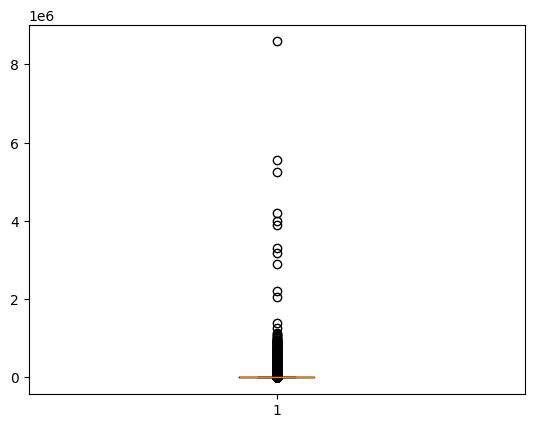

In [166]:
plt.boxplot(df['Area'])


In [167]:
df['Area_log'] = np.log1p(df['Area'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7967da993d40>,
 'caps': [<matplotlib.lines.Line2D at 0x7967da8ec680>,
 'boxes': [<matplotlib.lines.Line2D at 0x7967da14b500>],
 'medians': [<matplotlib.lines.Line2D at 0x7967da8ed550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7967da9768a0>],
 'means': []}

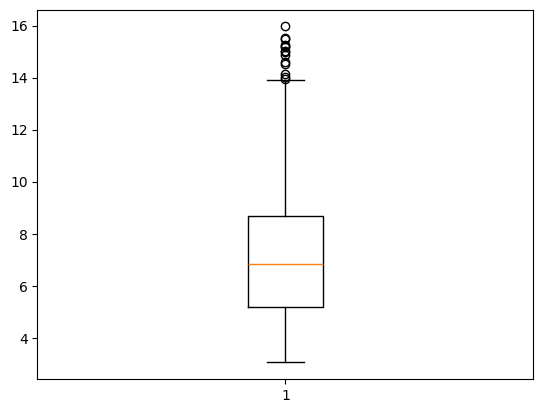

In [168]:
plt.boxplot(df["Area_log"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7967d9b72f60>,
 'caps': [<matplotlib.lines.Line2D at 0x7967d9b73590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7967d9fa85c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7967d9b70ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7967d9b73c80>],
 'means': []}

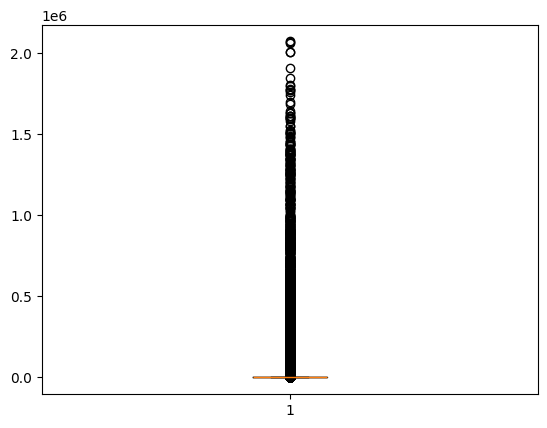

In [169]:
plt.boxplot(df["Production_Tonnes"])

In [170]:
df['Production_log'] = np.log1p(df['Production_Tonnes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7967d9d79340>,
 'caps': [<matplotlib.lines.Line2D at 0x7967d9d798b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7967da0f20c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7967d9d79df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7967d9d7a0f0>],
 'means': []}

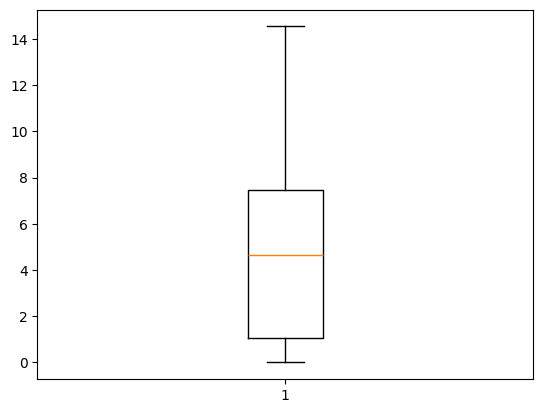

In [171]:
plt.boxplot(df["Production_log"])

Text(0, 0.5, 'Log(Production)')

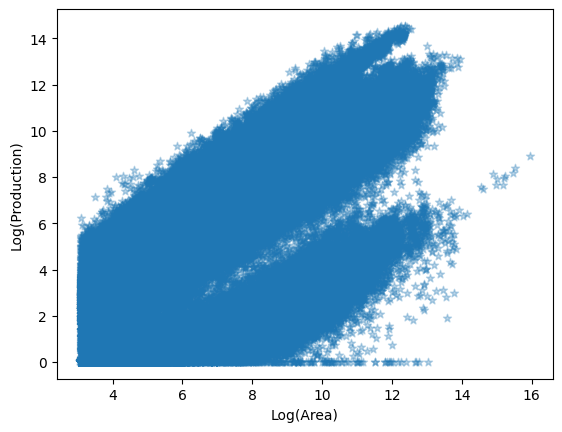

In [172]:
plt.scatter(df['Area_log'],df['Production_log'],alpha=0.3,marker="*")
plt.xlabel("Log(Area)")
plt.ylabel("Log(Production)")

In [173]:
cor = df['Area'].corr(df['Production_Tonnes'], method="pearson")
cor

np.float64(0.2905671657776845)

In [174]:
corr = df['Area_log'].corr(df['Production_log'], method="pearson")
corr

np.float64(0.6311645153052932)

In [175]:
df.columns


Index(['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area',
       'Production_Tonnes', 'Yield_Tonnes_Per_Hectare', 'Area_log',
       'Production_log'],
      dtype='object')

In [176]:
yearly_production = df.groupby("Crop_Year")["Production_Tonnes"].sum()

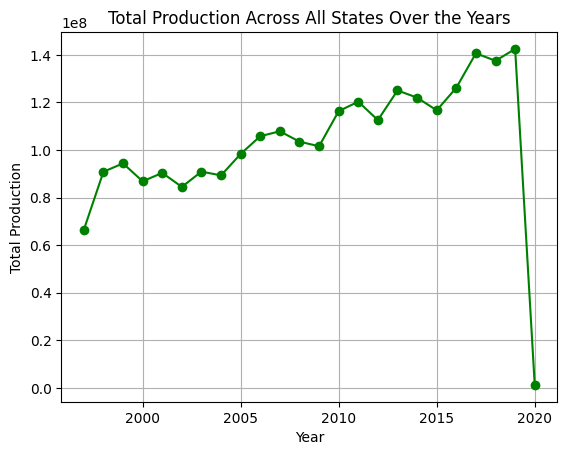

In [177]:
plt.plot(yearly_production.index, yearly_production.values, marker='o', linestyle='-', color='g')
plt.title("Total Production Across All States Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.grid(True)
plt.show()

In [178]:
df = df[df['Crop_Year'] != 2020]
yearly_production = df.groupby("Crop_Year")["Production_Tonnes"].sum()

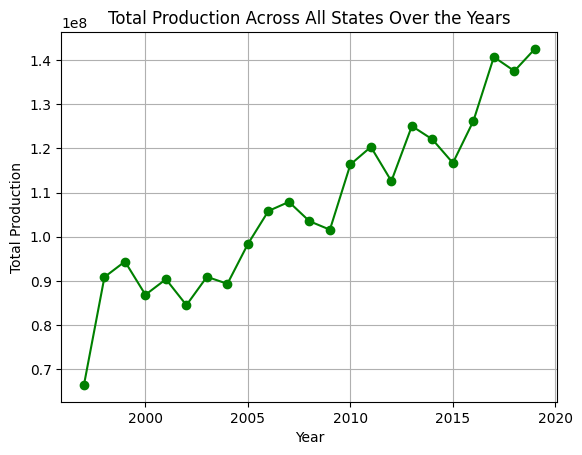

In [179]:
plt.plot(yearly_production.index, yearly_production.values, marker='o', linestyle='-', color='g')
plt.title("Total Production Across All States Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.grid(True)
plt.show()

In [180]:
Average_yield=df.groupby("Crop_Year")["Yield_Tonnes_Per_Hectare"].mean().reset_index()


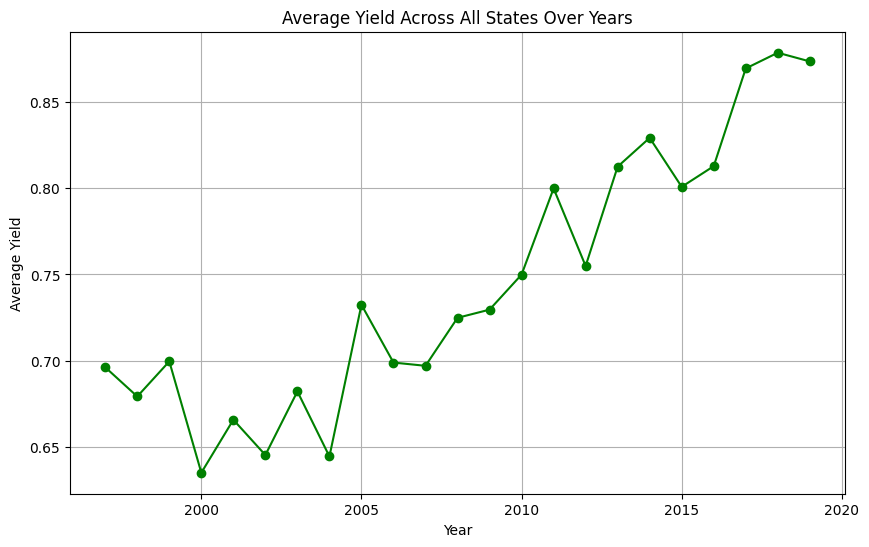

In [181]:
plt.figure(figsize=(10,6))
plt.plot(Average_yield['Crop_Year'], Average_yield['Yield_Tonnes_Per_Hectare'], marker='o', color='green')
plt.title('Average Yield Across All States Over Years')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.grid(True)
plt.show()

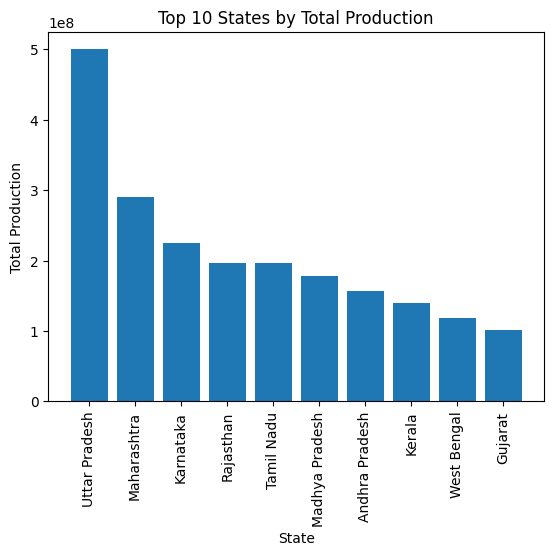

In [182]:
total_production_by_state = df.groupby('State')['Production_Tonnes'].sum().reset_index()
top10_states = total_production_by_state.sort_values(by='Production_Tonnes', ascending=False).head(10)
plt.bar(top10_states['State'],top10_states['Production_Tonnes'])
plt.title('Top 10 States by Total Production')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Puducherry'),
  Text(1, 0, 'Tamil Nadu'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'West Bengal'),
  Text(4, 0, 'Goa'),
  Text(5, 0, 'Haryana'),
  Text(6, 0, 'Punjab'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Andaman and Nicobar Island'),
  Text(9, 0, 'Andhra Pradesh')])

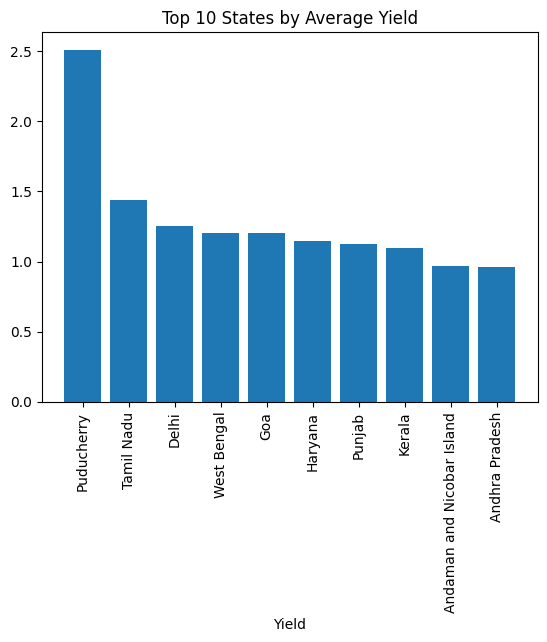

In [183]:
Average_yield_by_states=df.groupby("State")["Yield_Tonnes_Per_Hectare"].mean().reset_index()
top10_states_by_Yield=Average_yield_by_states.sort_values(by="Yield_Tonnes_Per_Hectare",ascending=False).head(10)
plt.bar(top10_states_by_Yield["State"],top10_states_by_Yield["Yield_Tonnes_Per_Hectare"])
plt.title("Top 10 States by Average Yield")
plt.xlabel("STates")
plt.xlabel("Yield")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sugarcane'),
  Text(1, 0, 'Coconut'),
  Text(2, 0, 'Rice'),
  Text(3, 0, 'Wheat'),
  Text(4, 0, 'Gram'),
  Text(5, 0, 'Rapeseed & Mustard'),
  Text(6, 0, 'Jowar'),
  Text(7, 0, 'Cotton(lint)'),
  Text(8, 0, 'Potato'),
  Text(9, 0, 'Ragi')])

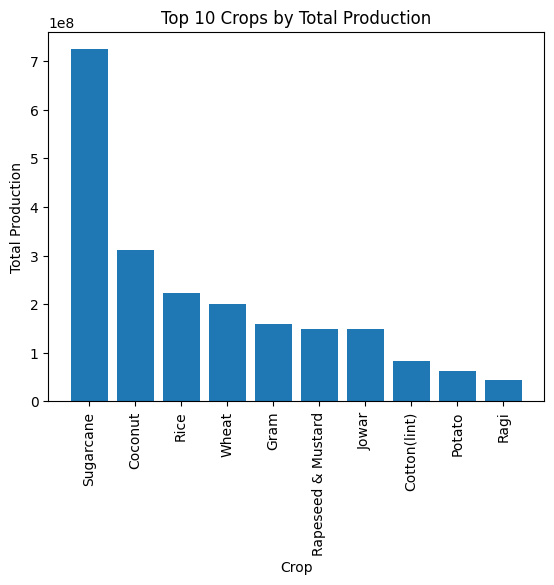

In [184]:
total_production_by_crop=df.groupby("Crop")["Production_Tonnes"].sum().reset_index()
top10_Crops_by_production=total_production_by_crop.sort_values(by="Production_Tonnes",ascending=False).head(10)
plt.bar(top10_Crops_by_production["Crop"],top10_Crops_by_production["Production_Tonnes"])
plt.title("Top 10 Crops by Total Production")
plt.xlabel("Crop")
plt.ylabel("Total Production")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Coconut'),
  Text(1, 0, 'Sugarcane'),
  Text(2, 0, 'Banana'),
  Text(3, 0, 'Tapioca'),
  Text(4, 0, 'Barley'),
  Text(5, 0, 'Oilseeds total'),
  Text(6, 0, 'Jute'),
  Text(7, 0, 'other oilseeds'),
  Text(8, 0, 'Peas & beans (Pulses)'),
  Text(9, 0, 'Potato')])

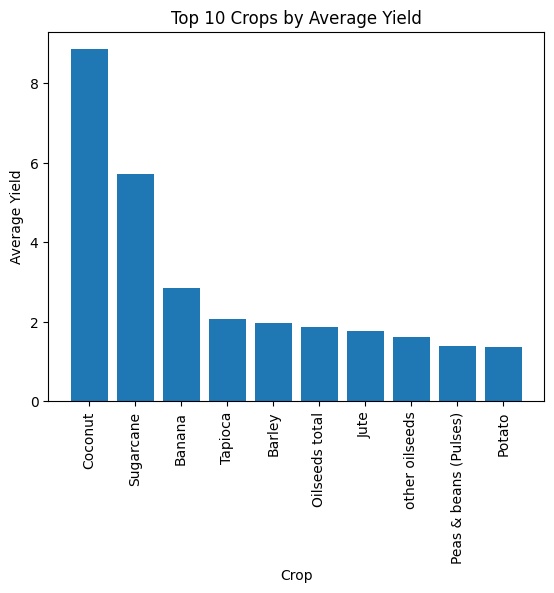

In [185]:
average_crops_by_Yield=df.groupby("Crop")["Yield_Tonnes_Per_Hectare"].mean().reset_index()
top10_crops_by_Yield=average_crops_by_Yield.sort_values(by=["Yield_Tonnes_Per_Hectare"], ascending=False).head(10)
plt.bar(top10_crops_by_Yield["Crop"],top10_crops_by_Yield["Yield_Tonnes_Per_Hectare"])
plt.title("Top 10 Crops by Average Yield")
plt.xlabel("Crop")
plt.ylabel("Average Yield")
plt.xticks(rotation=90)

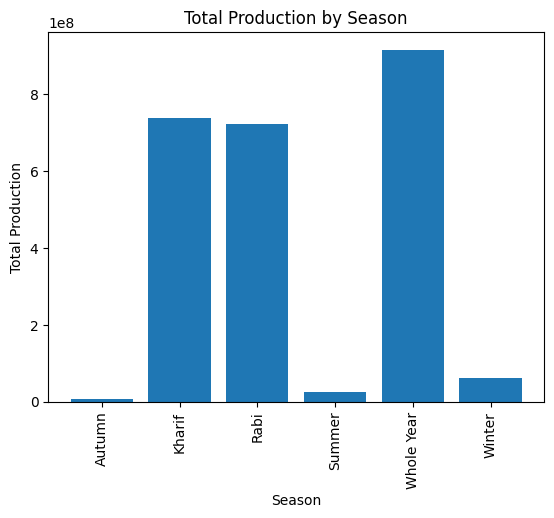

In [186]:
total_production_by_season=df.groupby("Season")["Production_Tonnes"].sum()
plt.bar(total_production_by_season.index,total_production_by_season.values)
plt.title("Total Production by Season")
plt.xlabel("Season")
plt.ylabel("Total Production")
plt.xticks(rotation=90)
plt.show()

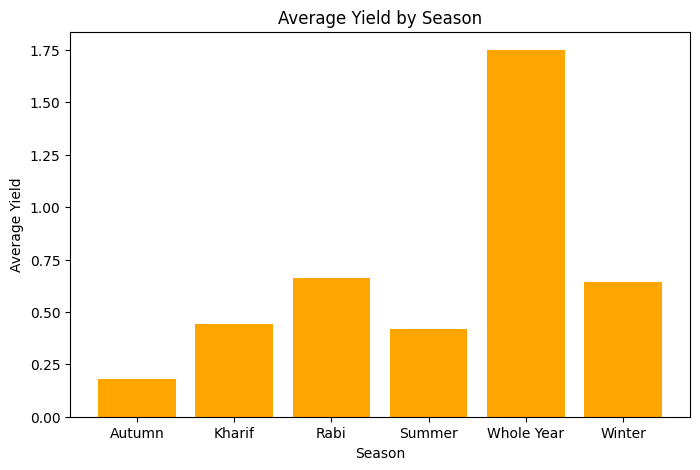

In [187]:
avg_yield_by_season = df.groupby('Season')['Yield_Tonnes_Per_Hectare'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.bar(avg_yield_by_season['Season'], avg_yield_by_season['Yield_Tonnes_Per_Hectare'], color='orange')
plt.title('Average Yield by Season')
plt.xlabel('Season')
plt.ylabel('Average Yield')
plt.show()

In [188]:
top5_crops = total_production_by_crop.sort_values(by='Production_Tonnes', ascending=False).head(5)['Crop'].tolist()


In [189]:
df_top5 = df[df['Crop'].isin(top5_crops)]


In [190]:
avg_yield_top5 = df_top5.groupby(['Crop_Year', 'Crop'])['Yield_Tonnes_Per_Hectare'].mean().reset_index()


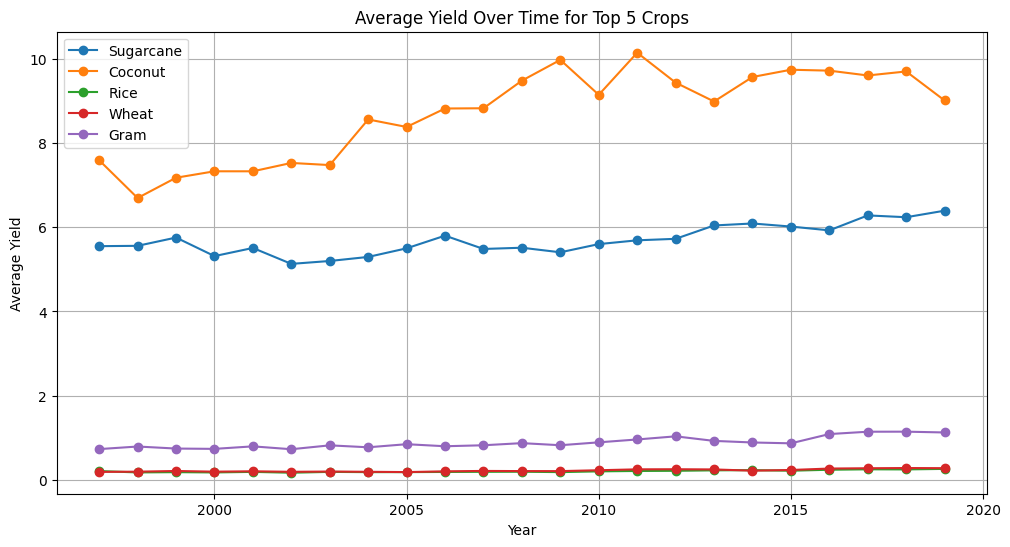

In [191]:
plt.figure(figsize=(12,6))

for crop in top5_crops:
    crop_data = avg_yield_top5[avg_yield_top5['Crop'] == crop]
    plt.plot(crop_data['Crop_Year'], crop_data['Yield_Tonnes_Per_Hectare'], marker='o', label=crop)

plt.title('Average Yield Over Time for Top 5 Crops')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.legend()
plt.grid(True)
plt.show()

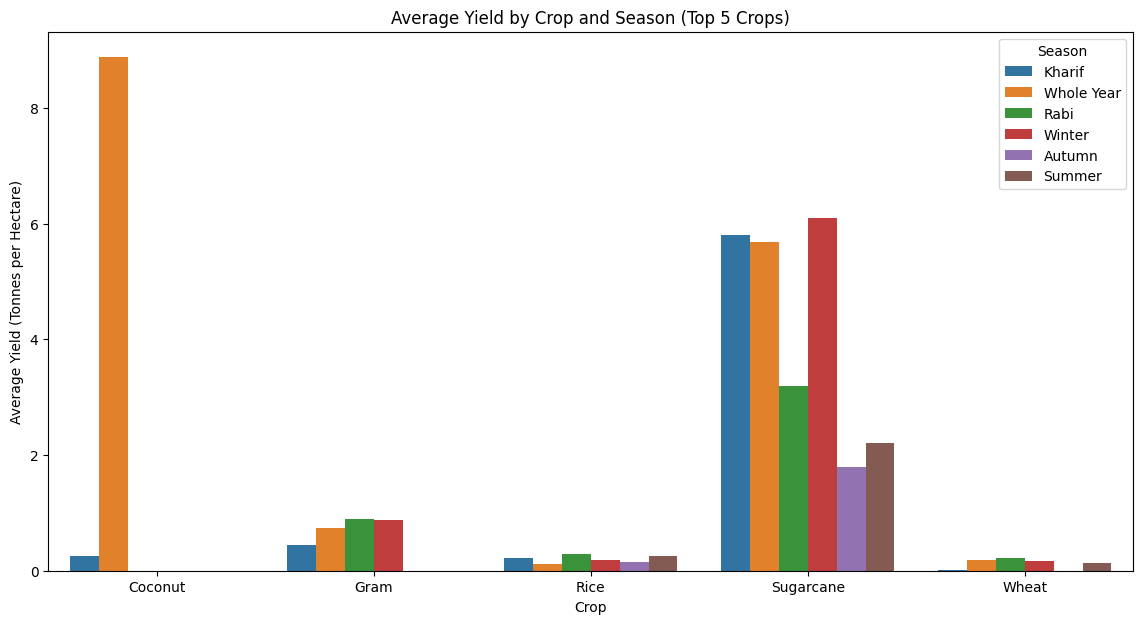

In [192]:
avg_yield_season = df_top5.groupby(['Crop', 'Season'])['Yield_Tonnes_Per_Hectare'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=avg_yield_season, x='Crop', y='Yield_Tonnes_Per_Hectare', hue='Season')

plt.title('Average Yield by Crop and Season (Top 5 Crops)')
plt.xlabel('Crop')
plt.ylabel('Average Yield (Tonnes per Hectare)')
plt.legend(title='Season')
plt.show()

In [193]:
df.to_csv("Data_for_Visualization.csv")